In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# #https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

In [4]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
# Replaced "Yes" and "No" with 1 and 0.
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes": 1, "No": 0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


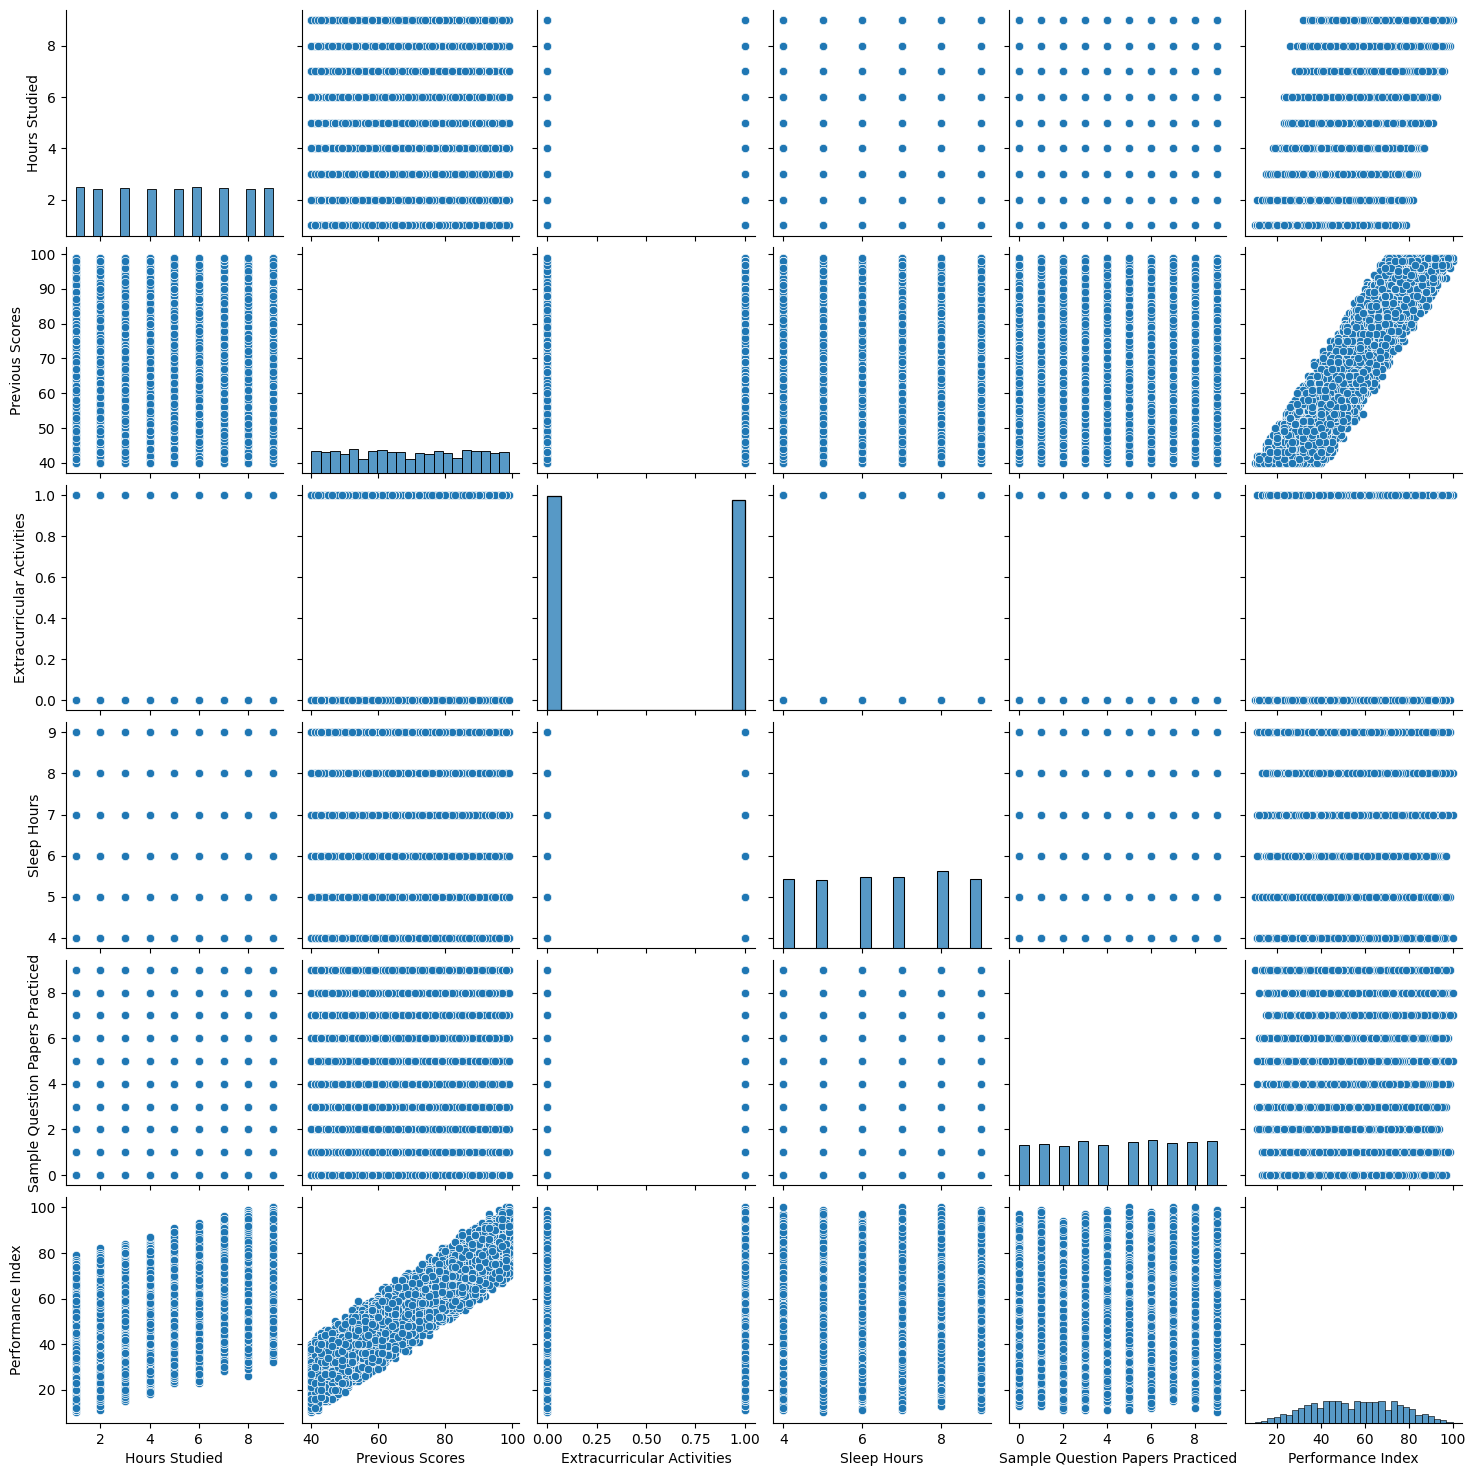

In [9]:
sns.pairplot(df)
plt.show()

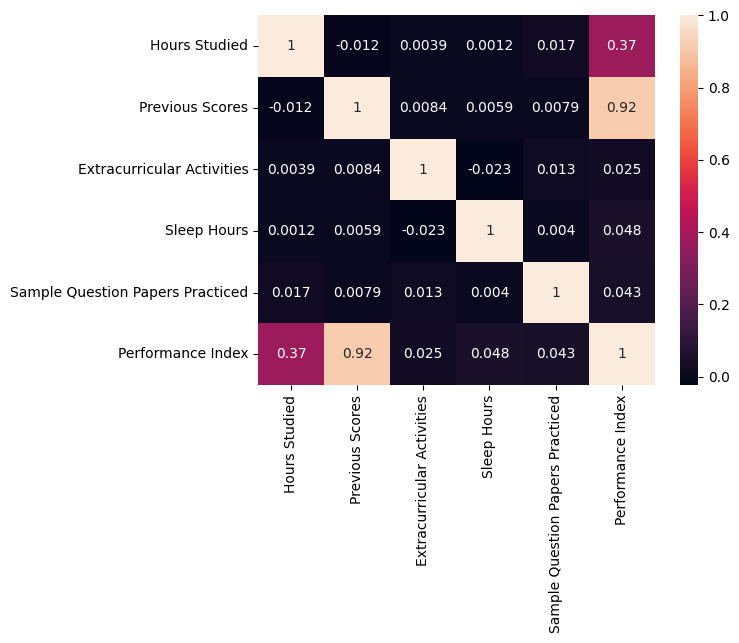

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
# Building the Models

In [12]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
param_tree = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
     "splitter": ["best", "random"],
     "max_features": ["sqrt", "log2",None],
     "max_depth": [1,3,5,15]
}

In [16]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_tree, cv=5, scoring="r2")

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 3, 5, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [18]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'random'}

In [19]:
y_pred = grid.predict(X_test)

In [20]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R2 Score:  0.9774067999534609
MSE:  8.360833333333334
MAE:  2.27


In [21]:
#The Decision Tree achieved an R² score of 0.98, which indicates excellent performance.

In [22]:
tree_model = DecisionTreeRegressor(criterion="squared_error", max_depth=4, max_features=None, splitter='random', random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42, splitter='random')

In [23]:
y_pred = tree_model.predict(X_test)

In [24]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R2 Score:  0.8807388172777685
MSE:  44.1337601500827
MAE:  5.2749555024422214


In [25]:
# The best parameter for `max_depth` was 15, but visualizing such a deep tree would take too long.  
# Therefore, we pruned the tree by setting `max_depth=4`.  
# Although the R² score decreases, this allows faster visualization and easier inspection of the tree structure.

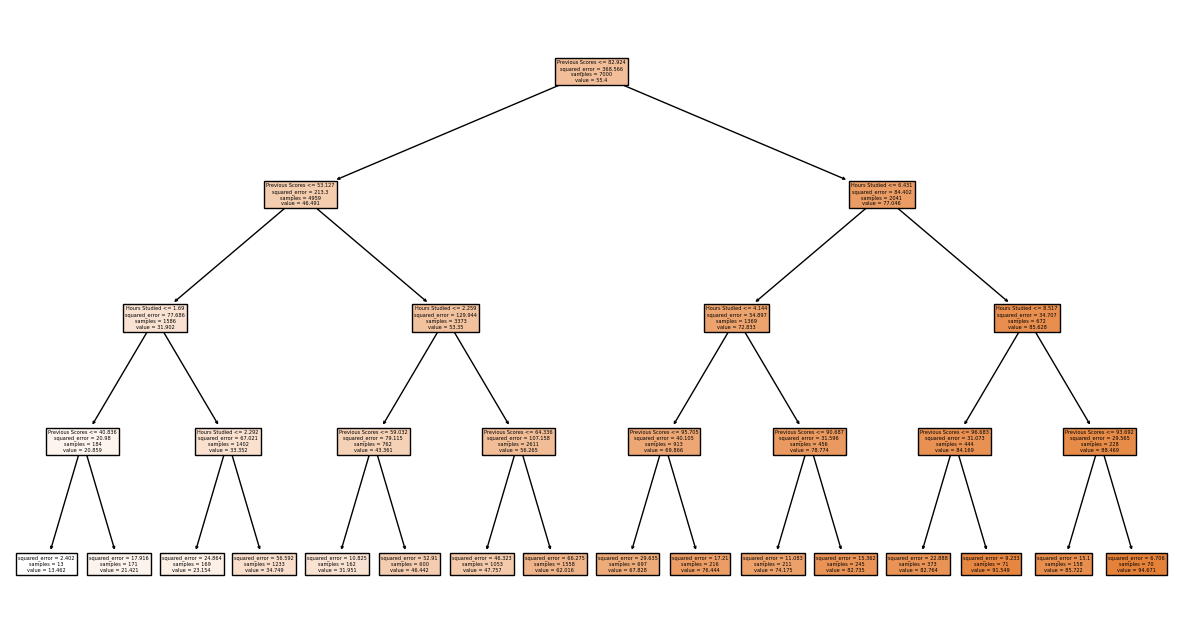

In [26]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(tree_model.fit(X_train,y_train), feature_names=X_train.columns, filled=True)
plt.show()

In [27]:
# Next, we will calculate and compare the results of Linear, Ridge, Lasso, and Elastic Net regression models.

In [28]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = linear.predict(X_test)

In [30]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R2 Score:  0.9890110607021136
MSE:  4.066563824092681
MAE:  1.6090437564045217


In [31]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [32]:
y_pred = ridge.predict(X_test)

In [33]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R2 Score:  0.9890110474218479
MSE:  4.066568738584132
MAE:  1.6090417453699533


In [34]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R2 Score:  0.9870016695439473
MSE:  4.810158557919516
MAE:  1.7342183863292169


In [35]:
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
y_pred = elasticnet.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R2 Score:  0.9870576320318506
MSE:  4.789449095191172
MAE:  1.7268200058291687
